In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading ta.json into a dataframe

In [7]:
df_ta = pd.read_json('C:\\Users\\SBS\IMPORTED_DATA\\ta.json')
#df_ta.head(50)
df_ta
#df_ta.to_excel("df_ta.xlsx")

,_id,interRSI,interBollingerBands,interROC,interMACD,interMOM,ADL,price,instrument,date,WEMA,OBV,RSI,ROC,MOM,ATR,Stochastic,WilliamsR,BollingerBands,MACD
0,{'$oid': '61fe0c065e2f1c1a60016390'},0,0,0,0,0,1350000,55.50,ASSUR MAGHREBIA,2020-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,{'$oid': '61fe0c065e2f1c1a60016395'},0,0,0,0,0,1580599,62.50,ASSUR MAGHREBIA,2022-01-10,59.772000,253847.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,{'$oid': '61fe0c065e2f1c1a6001639a'},0,0,0,0,0,1582877,62.84,ASSUR MAGHREBIA,2022-01-17,61.625449,255718.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'$oid': '61fe0c065e2f1c1a6001639f'},0,0,-1,0,-1,1585797,62.30,ASSUR MAGHREBIA,2022-01-28,62.005491,254510.0,66.75,-0.240192,"{'MOM': -1.200000000000002, 'EmaMOM': -0.01946...",1.968316,"{'k': 75.23510971786827, 'd': 80.02271409880136}",-24.764890,NaN,NaN
4,{'$oid': '61fe0c065e2f1c1a60016392'},0,0,0,0,0,1580176,57.50,ASSUR MAGHREBIA,2020-12-31,NaN,254078.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140333,{'$oid': '61fe0c2e5e2f1c1a600387bd'},1,1,0,0,-1,{'$numberDouble': '-Infinity'},0.83,SERVICOM,2022-01-17,1.766754,6150298.0,14.86,-58.500000,"{'MOM': -1.19, 'EmaMOM': -0.651370803372138}",0.120654,"{'k': 0, 'd': 26.086956521739193}",-100.000000,"{'middle': 1.9774999999999872, 'upper': 2.5208...","{'MACD': -0.10164524055147801, 'signal': -0.01..."
140334,{'$oid': '61fe0c2e5e2f1c1a600387be'},1,0,0,0,0,{'$numberDouble': '-Infinity'},1.05,SERVICOM,2022-01-25,1.623403,6214436.0,25.34,-48.019802,"{'MOM': -1.039999999999999, 'EmaMOM': -0.60911...",0.127750,"{'k': 16.923076923076934, 'd': 20.133779264214...",-83.076923,"{'middle': 1.925499999999987, 'upper': 2.59924...","{'MACD': -0.156092200123417, 'signal': -0.0451..."
140335,{'$oid': '61fe0c2e5e2f1c1a600387bf'},0,0,0,0,0,{'$numberDouble': '-Infinity'},1.23,SERVICOM,2022-01-31,1.544723,6250366.0,32.64,-41.148325,"{'MOM': -0.899999999999999, 'EmaMOM': -0.55081...",0.131483,"{'k': 30.769230769230777, 'd': 15.89743589743594}",-69.230769,"{'middle': 1.879499999999987, 'upper': 2.60897...","{'MACD': -0.182612271581506, 'signal': -0.0726..."
140336,{'$oid': '61fe0c2e5e2f1c1a600387c0'},0,1,0,0,0,{'$numberDouble': '-Infinity'},1.28,SERVICOM,2022-02-01,1.491778,6282109.0,34.56,-39.906103,"{'MOM': -0.8200000000000001, 'EmaMOM': -0.5191...",0.125662,"{'k': 34.61538461538463, 'd': 27.435897435897484}",-65.384615,"{'middle': 1.8364999999999871, 'upper': 2.6000...","{'MACD': -0.19732044982836802, 'signal': -0.09..."


# Data Understanding

### Dataframe shape (Dimensions)

In [8]:
df_ta.shape

(140338, 20)

### DATA TYPES inside df_ta


#### We look for all the data types inside our dataframe and they numbers accordingly 

In [9]:
df_ta.dtypes.value_counts()

object            7
float64           7
int64             5
datetime64[ns]    1
dtype: int64

#### Plotting results

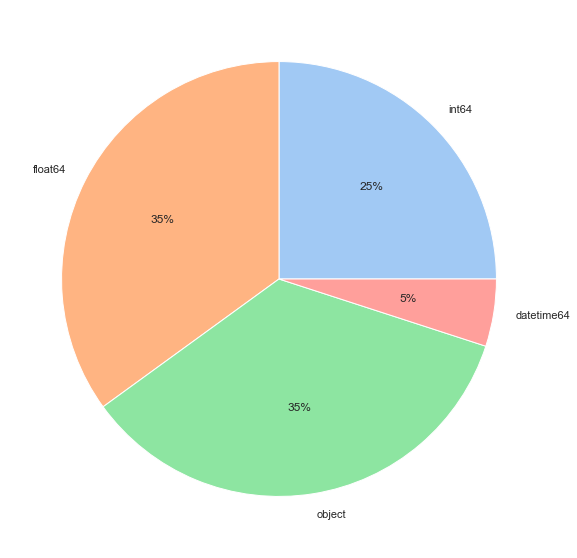

In [10]:
#define data
data = [5, 7, 7, 1]
labels = ['int64', 'float64', 'object', 'datetime64']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:4]

#create pie chart
sns.set(rc = {'figure.figsize':(15,10)})
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

### Check all instruments available from the Tunisian Stock market & their total number

In [11]:
all_instruments = df_ta['instrument'].unique()
print(all_instruments)  

['ASSUR MAGHREBIA' 'AIR LIQUDE TSIE' 'ARTES' 'ELECTROSTAR' 'SOPAT'
 'ALKIMIA' 'BEST LEASE' 'HANNIBAL LEASE' 'SOTUMAG' 'BH' 'MPBS'
 'TAWASOL GP HOLDING' 'ATELIER MEUBLE INT' 'ICF' 'SOTUVER' 'AMEN BANK'
 'MONOPRIX' 'STIP' 'BT' 'POULINA GP HOLDING' 'TUNISAIR' 'BTE (ADP)' 'SAH'
 'TUNISIE LEASING' 'AETECH' 'ASSAD' 'CEREALIS' 'SFBT' 'UIB'
 'ENNAKL AUTOMOBILES' 'SOTEMAIL' 'ESSOUKNA' 'SOTETEL' 'ADWYA' 'AMS' 'BNA'
 'PLAC. TSIE-SICAF' 'TUNIS RE' 'CIL' 'SIAME' 'UNIMED' 'CIMENTS DE BIZERTE'
 'SIMPAR' 'BH ASSURANCE' 'NEW BODY LINE' 'TELNET HOLDING' 'DELICE HOLDING'
 'SOMOCER' 'CITY CARS' 'SITS' 'ATL' 'GIF-FILTER' 'SOTRAPIL' 'ASTREE'
 'EURO-CYCLES' 'SOTIPAPIER' 'BIAT' 'ONE TECH HOLDING' 'TUNINVEST-SICAR'
 'BH LEASING' 'OFFICEPLAST' 'TPR' 'WIFACK INT BANK' 'ATTIJARI LEASING'
 'MAGHREB INTERN PUB' 'STB' 'ATTIJARI BANK' 'MAGASIN GENERAL' 'STAR' 'ATB'
 'LAND OR' 'SPDIT - SICAF' 'CELLCOM' 'SERVICOM' 'UBCI' 'CARTHAGE CEMENT'
 'SANIMED' 'UADH']


In [12]:
nbr = len(all_instruments)
print ("Total nbr of instruments = ", nbr)

Total nbr of instruments =  78


### Checking the Number of rows available for a selected instrument

In [13]:
#datetime import for datime64 datatype
from datetime import datetime

In [14]:
instru = "ADWYA"
df2=df_ta.loc[df_ta['instrument'] == instru]
YEAR =[]
nb_r =[]
for i in range(10):
    lastTradingData = df2[(df_ta['date'] >= datetime(2012+i,1,1)) & (df2['date'] <= datetime(2012+i,12,31))]
    YEAR.append(2012+i)
    nb_r.append(len(lastTradingData))

C:\Users\SBS\AppData\Local\Temp/ipykernel_19044/2766693794.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  lastTradingData = df2[(df_ta['date'] >= datetime(2012+i,1,1)) & (df2['date'] <= datetime(2012+i,12,31))]


#### We check the overall Years 

In [15]:
print("YEARS = ",YEAR)

YEARS =  [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


#### We check the number of rows for each found year for the instrument "ADWYA" 

In [16]:
print('For each year ==> the number of rows for " ', instru, ' "')
print(YEAR)
print(nb_r)

For each year ==> the number of rows for "  ADWYA  "
[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
[250, 245, 247, 240, 245, 249, 248, 242, 247, 219]


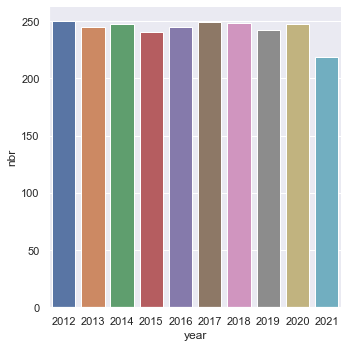

In [67]:
# creating the bar plot
datasset = pd.DataFrame({'year': YEAR, 'nbr': nb_r}, columns=['year', 'nbr'])
# who v/s fare barplot
sns.set(rc = {'figure.figsize':(20,15)})
sns.catplot(x = 'year',y = 'nbr',kind="bar",data = datasset)

### Comparing number of data availble (rows) throughout the years 2012 --> 2021

In [17]:
#YEAR = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
nb_y=0
nbb =[]
yearIndex = 1
df_nbRows_YEARS = pd.DataFrame(columns = ['Year', 'nb'])

for year_i in YEAR:
    current_year = year_i
    for j in df_ta['date']: 
        #dd = datetime.strptime(str(j), '%Y-%m-%d %H:%M:%S') 
        if ( j.year == current_year):
            nb_y= nb_y+1
    print('NUMBER OF NB ROWS  FOR YEAR ', year_i, '= ',nb_y)
    
    nbb.append(str(year_i))
    nbb.append(nb_y)
    df_nbRows_YEARS.loc[yearIndex]=nbb
    nb_y=0
    yearIndex+=1
    nbb=[]

NUMBER OF NB ROWS  FOR YEAR  2012 =  11635
NUMBER OF NB ROWS  FOR YEAR  2013 =  12016
NUMBER OF NB ROWS  FOR YEAR  2014 =  13924
NUMBER OF NB ROWS  FOR YEAR  2015 =  14754
NUMBER OF NB ROWS  FOR YEAR  2016 =  15174
NUMBER OF NB ROWS  FOR YEAR  2017 =  14952
NUMBER OF NB ROWS  FOR YEAR  2018 =  15212
NUMBER OF NB ROWS  FOR YEAR  2019 =  14206
NUMBER OF NB ROWS  FOR YEAR  2020 =  14415
NUMBER OF NB ROWS  FOR YEAR  2021 =  12768


In [18]:
#verify df_nbRows_YEARS before plotting
df_nbRows_YEARS

,Year,nb
1,2012,11635
2,2013,12016
3,2014,13924
4,2015,14754
5,2016,15174
6,2017,14952
7,2018,15212
8,2019,14206
9,2020,14415
10,2021,12768


#### Plotting Results

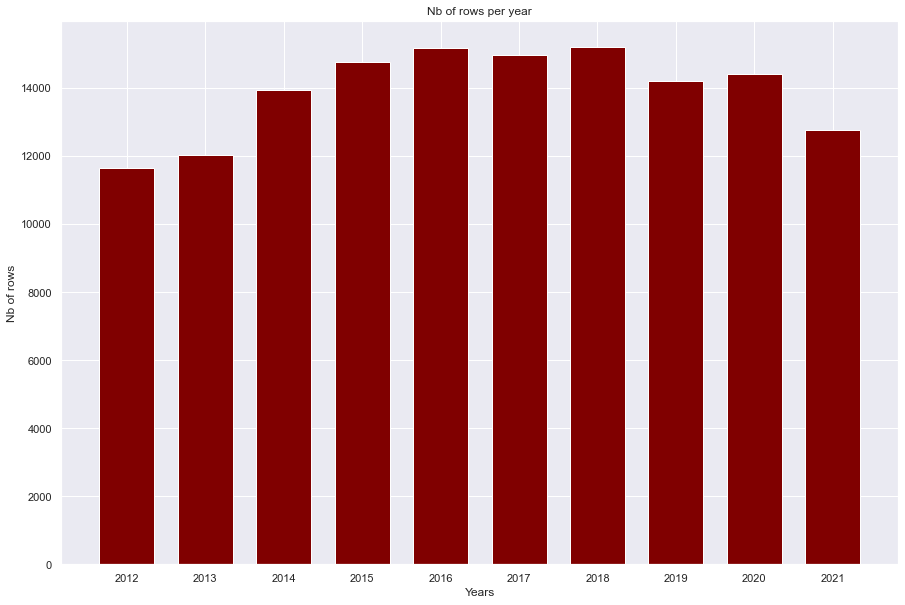

In [19]:
#define data
data = [11635, 12016, 13924, 14754, 15174, 14952, 15212, 14206, 14415, 12768]
labels = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(labels, data, color ='maroon', width = 0.7)
 
plt.xlabel("Years")
plt.ylabel("Nb of rows")
plt.title("Nb of rows per year")
plt.show()

### Comparing the data volume of each instrument for all years (2012 -> 2021)

#### Transfer our instruments into a list

In [20]:
stocks = ['ASSUR MAGHREBIA', 'AIR LIQUDE TSIE', 'ARTES', 'ELECTROSTAR', 'SOPAT', 'ALKIMIA','BEST LEASE', 'HANNIBAL LEASE' ,'SOTUMAG', 'BH' ,'MPBS','TAWASOL GP HOLDING', 'ATELIER MEUBLE INT', 'ICF', 
'SOTUVER' ,'AMEN BANK', 'MONOPRIX' ,'STIP', 'BT' ,'POULINA GP HOLDING' ,'TUNISAIR', 'BTE (ADP)', 'SAH', 'TUNISIE LEASING' ,'AETECH', 'ASSAD', 'CEREALIS', 'SFBT', 'UIB',
 'ENNAKL AUTOMOBILES' ,'SOTEMAIL', 'ESSOUKNA', 'SOTETEL', 'ADWYA' ,'AMS' ,'BNA', 'PLAC. TSIE-SICAF', 'TUNIS RE', 'CIL', 'SIAME', 'UNIMED' ,'CIMENTS DE BIZERTE', 'SIMPAR' ,
 'BH ASSURANCE' ,'NEW BODY LINE' ,'TELNET HOLDING' ,'DELICE HOLDING', 'SOMOCER', 'CITY CARS' ,'SITS' ,'ATL' ,'GIF-FILTER', 'SOTRAPIL' ,'ASTREE', 'EURO-CYCLES', 'SOTIPAPIER' ,
 'BIAT', 'ONE TECH HOLDING' ,'TUNINVEST-SICAR', 'BH LEASING', 'OFFICEPLAST', 'TPR','WIFACK INT BANK' ,'ATTIJARI LEASING', 'MAGHREB INTERN PUB', 'STB', 'ATTIJARI BANK', 'MAGASIN GENERAL',
  'STAR','ATB', 'LAND OR', 'SPDIT - SICAF', 'CELLCOM' ,'SERVICOM' ,'UBCI' ,'CARTHAGE CEMENT', 'SANIMED', 'UADH']


#### Get the entire instrument row of df_ta (df_ta['instrument']) and put them into a list ( for volume calc ) 

In [21]:
li_instrument = []
li_instrument = list( df_ta['instrument'])
print(li_instrument)

['ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'ASSUR MAGHREBIA', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE TSIE', 'AIR LIQUDE

#### Calc the number of entries for each instrument

In [22]:
nbRows_stock_i = 0
nbRows_perStock = pd.DataFrame(columns = ['Instrument', 'nbr de lignes'])

nbb = []
index = 1

def search(list, platform):
    count=0
    for i in range(len(li_instrument)):
        if list[i] == platform:
            count=count+1
    return count
for i in stocks:
    nbRows_stock_i = search(li_instrument, i)
    print(i , '=', nbRows_stock_i)
    nbb.append(str(i))
    nbb.append(nbRows_stock_i)

    nbRows_perStock.loc[index]=nbb
    index=index+1
    nbb=[]
    

ASSUR MAGHREBIA = 20
AIR LIQUDE TSIE = 1625
ARTES = 2441
ELECTROSTAR = 2216
SOPAT = 2323
ALKIMIA = 862
BEST LEASE = 784
HANNIBAL LEASE = 1086
SOTUMAG = 2372
BH = 2171
MPBS = 1848
TAWASOL GP HOLDING = 1772
ATELIER MEUBLE INT = 1145
ICF = 1713
SOTUVER = 2498
AMEN BANK = 2469
MONOPRIX = 2400
STIP = 664
BT = 2490
POULINA GP HOLDING = 2389
TUNISAIR = 2451
BTE (ADP) = 1586
SAH = 1985
TUNISIE LEASING = 1435
AETECH = 1502
ASSAD = 2471
CEREALIS = 1359
SFBT = 2502
UIB = 2461
ENNAKL AUTOMOBILES = 2438
SOTEMAIL = 1035
ESSOUKNA = 2059
SOTETEL = 2437
ADWYA = 2453
AMS = 2226
BNA = 2423
PLAC. TSIE-SICAF = 187
TUNIS RE = 2268
CIL = 1722
SIAME = 2355
UNIMED = 1395
CIMENTS DE BIZERTE = 1839
SIMPAR = 1594
BH ASSURANCE = 177
NEW BODY LINE = 1959
TELNET HOLDING = 2481
DELICE HOLDING = 1693
SOMOCER = 2498
CITY CARS = 1875
SITS = 1912
ATL = 2317
GIF-FILTER = 2358
SOTRAPIL = 2288
ASTREE = 435
EURO-CYCLES = 2129
SOTIPAPIER = 1896
BIAT = 2464
ONE TECH HOLDING = 2079
TUNINVEST-SICAR = 1168
BH LEASING = 232
OFFICE

In [23]:
nbRows_perStock
#nbRows_perStock.to_json('Nbr_Rows_Per_Stock.json')
#nbRows_perStock.to_excel("Nbr_Rows_Per_Stock.xlsx") 

,Instrument,nbr de lignes
1,ASSUR MAGHREBIA,20
2,AIR LIQUDE TSIE,1625
3,ARTES,2441
4,ELECTROSTAR,2216
5,SOPAT,2323
...,...,...
74,SERVICOM,2284
75,UBCI,1263
76,CARTHAGE CEMENT,2439
77,SANIMED,531


#### Plot the above result

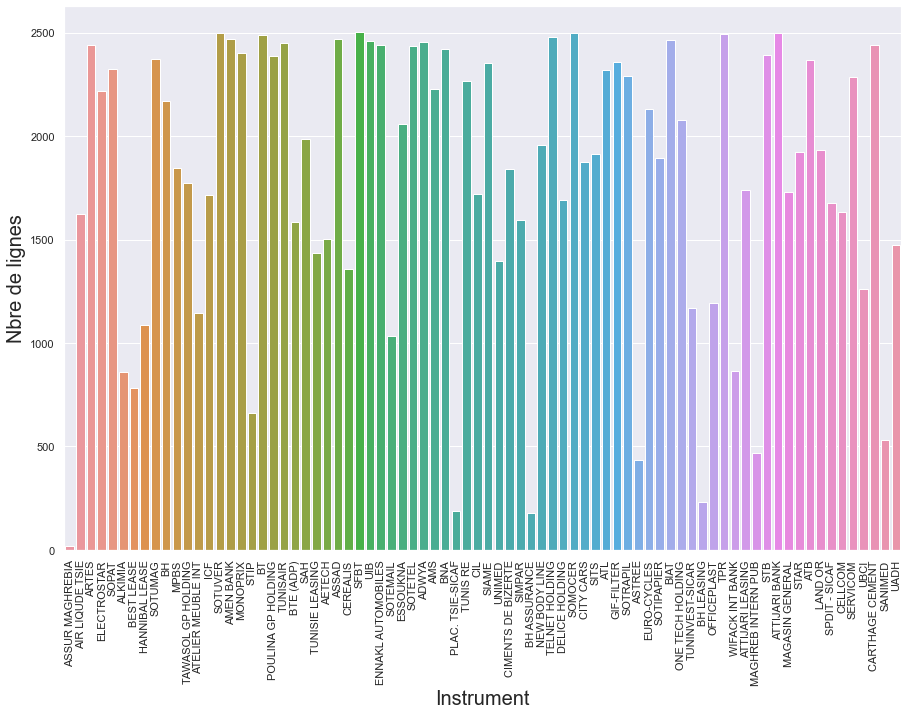

In [24]:
#define data
sns.barplot(x = 'Instrument', y = 'nbr de lignes', data = nbRows_perStock)
plt.xticks(rotation=90)
plt.xlabel("Instrument", size=20)
plt.ylabel("Nbre de lignes", size=20)
# Show the plot
plt.show()

# DATA PREPERATION

### Loading price of a specific instrument into a dataframe (df_price)

In [25]:
new_df_ta = df_ta[['instrument', 'price', 'date', 'RSI', 'ROC']].copy()

In [69]:
#new_df_ta
new_df_ta #.head(60)
#new.shape

,instrument,price,date,RSI,ROC
0,ASSUR MAGHREBIA,55.50,2020-12-29,NaN,NaN
1,ASSUR MAGHREBIA,62.50,2022-01-10,NaN,NaN
2,ASSUR MAGHREBIA,62.84,2022-01-17,NaN,NaN
3,ASSUR MAGHREBIA,62.30,2022-01-28,66.75,-0.240192
4,ASSUR MAGHREBIA,57.50,2020-12-31,NaN,NaN
...,...,...,...,...,...
140333,SERVICOM,0.83,2022-01-17,14.86,-58.500000
140334,SERVICOM,1.05,2022-01-25,25.34,-48.019802
140335,SERVICOM,1.23,2022-01-31,32.64,-41.148325
140336,SERVICOM,1.28,2022-02-01,34.56,-39.906103


In [70]:
instru = "SERVICOM"
df_instrument = new_df_ta.loc[ new_df_ta['instrument'] == instru]
df_instrument.reset_index(drop=True)

,instrument,price,date,RSI,ROC
0,SERVICOM,11.299,2012-01-02,NaN,NaN
1,SERVICOM,11.229,2012-01-03,NaN,NaN
2,SERVICOM,11.469,2012-01-04,NaN,NaN
3,SERVICOM,11.369,2012-01-05,NaN,NaN
4,SERVICOM,11.519,2012-01-06,NaN,NaN
...,...,...,...,...,...
2279,SERVICOM,0.830,2022-01-17,14.86,-58.500000
2280,SERVICOM,1.050,2022-01-25,25.34,-48.019802
2281,SERVICOM,1.230,2022-01-31,32.64,-41.148325
2282,SERVICOM,1.280,2022-02-01,34.56,-39.906103


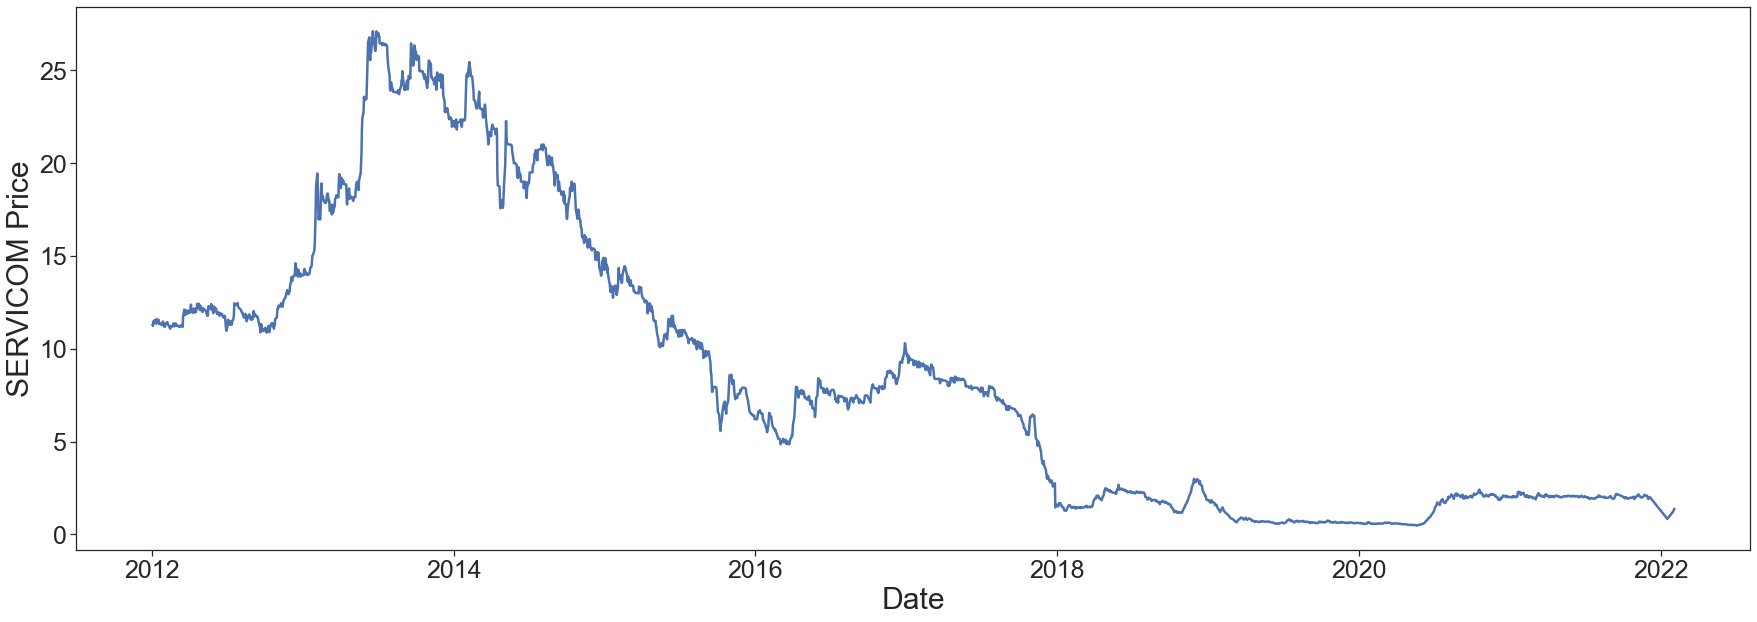

In [71]:
sns.set_style('ticks')
plt.figure(figsize=(30,10))
#plt.rcParams["axes.labelsize"] = 30
sns.lineplot(data=df_instrument,x="date", y="price", palette="tab10", linewidth=2.5)
plt.xticks(size=25)
plt.yticks(size=25)
plt.xlabel("Date",size=30)
YLABEL = instru + " Price"
plt.ylabel(YLABEL,size=30)
plt.show()

In [97]:
df_price0 = pd.DataFrame(df_ta['price'].loc[df_ta['instrument'] == instru]).reset_index(drop=True)
df_price0.shape

(2284, 1)

In [98]:
df_price0.shape[0]
#df_price

2284

In [99]:
df_price0

,price
0,11.299
1,11.229
2,11.469
3,11.369
4,11.519
...,...
2279,0.830
2280,1.050
2281,1.230
2282,1.280


### LSTM ARE SENSITIVE TO DATA SCALE ==> apply MinMaxScaler to scale the data accordingly

In [100]:
#import lib for scaling
from sklearn.preprocessing import MinMaxScaler

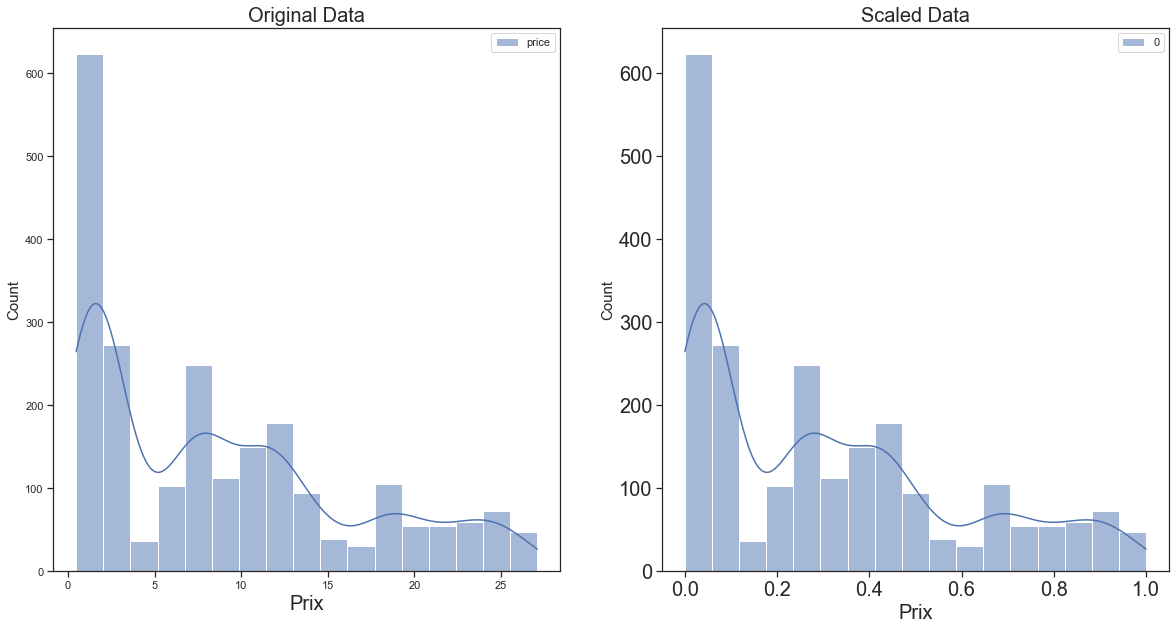

In [101]:
#scaler=MinMaxScaler(feature_range=(0,1))
#df_price = scaler.fit_transform(np.array(df_price).reshape(-1,1))
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.set_style('ticks')
graph= sns.histplot(df_price0,kde='True', ax=ax[0])
ax[0].set_title("Original Data")
graph.set_xlabel("Prix", fontsize = 20)
graph.set_ylabel("Count", fontsize = 15)

scaler=MinMaxScaler(feature_range=(0,1))
df_price = scaler.fit_transform(np.array(df_price0).reshape(-1,1))
graph2=sns.histplot(df_price, kde='True', ax=ax[1])

graph2.set_xlabel("Prix", fontsize = 20)
graph2.set_ylabel("Count", fontsize = 15)
ax[0].set_title("Original Data", fontsize= 20)
ax[1].set_title("Scaled Data", fontsize= 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [102]:
print("Price after scale : ",df_price)

Price after scale :  [[0.40664664]
 [0.40401802]
 [0.41303042]
 ...
 [0.02853924]
 [0.03041682]
 [0.03417199]]


### Splitting Dataset into a Train / Test split

In [103]:
# 65% (0.65) of dataframe being training size
training_size = int(len(df_price)*0.65)

#the rest assigned to test size 
test_size = len(df_price)-training_size 

train_data,test_data=df_price[0:training_size,:],df_price[training_size:len(df_price),:1]

In [105]:
print("train size = ",training_size, "       || test size = ", test_size)
print("length train_data = ", len(train_data), "|| length test_data = ", len(test_data))


train size =  1484        || test size =  800
length train_data =  1484 || length test_data =  800


### DATA PREPROCESSING -- Creating Dataset matrix from train / test arrays previously created and reshaping them accordingly to a timestep standard (100 days)

In [106]:
#convert array of values into a dataset matrix

def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

from sklearn.model_selection import train_test_split

In [111]:
# reshape into X=t, t+3, t+2, ... and Y=t+4
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)


#X_train
#Y_train

##### verify shapes train test

In [112]:
print("========= TRAIN SPLIT =========")
print("X_train .shape = ",X_train.shape)
print("Y_train .shape = ",Y_train.shape)

========= TRAIN SPLIT =========
X_train .shape =  (1383, 100)
Y_train .shape =  (1383,)


In [113]:
print("========= TEST SPLIT =========")
print("X_test .shape = ", X_test.shape)
print("Y_test .shape = ", Y_test.shape)

========= TEST SPLIT =========
X_test .shape =  (699, 100)
Y_test .shape =  (699,)


In [41]:
#Y_train

### Reshape Inputs to be [samples, time_steps, Features] ==> reshape needed for LSTM tensor Architecture

#### tensor shape according to this example :  
#### Xtrain (1383 interior lists, 100 list inside each interior list, 1 each has one Value only) || Xtest (699,100,1)

In [42]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [114]:
print(X_train)

[[0.40664664 0.40401802 0.41303042 ... 0.43815246 0.44337214 0.4298911 ]
 [0.40401802 0.41303042 0.40927525 ... 0.44337214 0.4298911  0.43251971]
 [0.41303042 0.40927525 0.414908   ... 0.4298911  0.43251971 0.44337214]
 ...
 [0.15208412 0.14344724 0.13368382 ... 0.05107022 0.0529478  0.05670297]
 [0.14344724 0.13368382 0.12467142 ... 0.0529478  0.05670297 0.06120916]
 [0.13368382 0.12467142 0.13067968 ... 0.05670297 0.06120916 0.06571536]]


# MODELING

In [44]:
#Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### Creating a Stacked LSTM model:

#### each layers is an identical LSTM layer with a final Dense layer || COST FUNCTION = Mean Squared Error

In [45]:
# - Units : Positive integer, dimensionality of the output space.
# - Return_sequences : Boolean. Whether to return the last output. in the output sequence,
# or the full sequence. Default: False.
# - input_shape : 100, 1


In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1)) 
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
#verification du modele
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
# - fit : Trains the model for a fixed number of epochs (iterations on a dataset).
# - object : Model to train.
# - X : Vector, matrix, or array of training data 
# - Y : Vector, matrix, or array of target (label) data (or list if the model has multiple outputs)
# - epochs : Number of epochs to train the model. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.
# - validation_data	: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
# - batch_size : Integer or NULL. Number of samples per gradient update. If unspecified, batch_size will default to 32.
# - verbose	: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch).

In [49]:
Fitting = model.fit(X_train,Y_train,validation_data=(X_test,Y_test), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
22/22 [==============================] - 6s 145ms/step - loss: 0.0449 - val_loss: 0.0112
Epoch 2/50
22/22 [==============================] - 2s 105ms/step - loss: 0.0042 - val_loss: 1.4225e-04
Epoch 3/50
22/22 [==============================] - 2s 106ms/step - loss: 0.0016 - val_loss: 9.4648e-05
Epoch 4/50
22/22 [==============================] - 2s 106ms/step - loss: 0.0013 - val_loss: 1.2113e-04
Epoch 5/50
22/22 [==============================] - 2s 104ms/step - loss: 0.0014 - val_loss: 9.8481e-05
Epoch 6/50
22/22 [==============================] - 2s 101ms/step - loss: 0.0013 - val_loss: 9.0739e-05
Epoch 7/50
22/22 [==============================] - 2s 103ms/step - loss: 0.0013 - val_loss: 9.3240e-05
Epoch 8/50
22/22 [==============================] - 2s 103ms/step - loss: 0.0013 - val_loss: 8.8327e-05
Epoch 9/50
22/22 [==============================] - 2s 104ms/step - loss: 0.0012 - val_loss: 8.7503e-05
Epoch 10/50
22/22 [==============================] - 2s 104ms/step -

### Evaluation

##### We check the training accuracy compared to the validation accuracy to see if there's one of the following problems : underfitting or overfitting

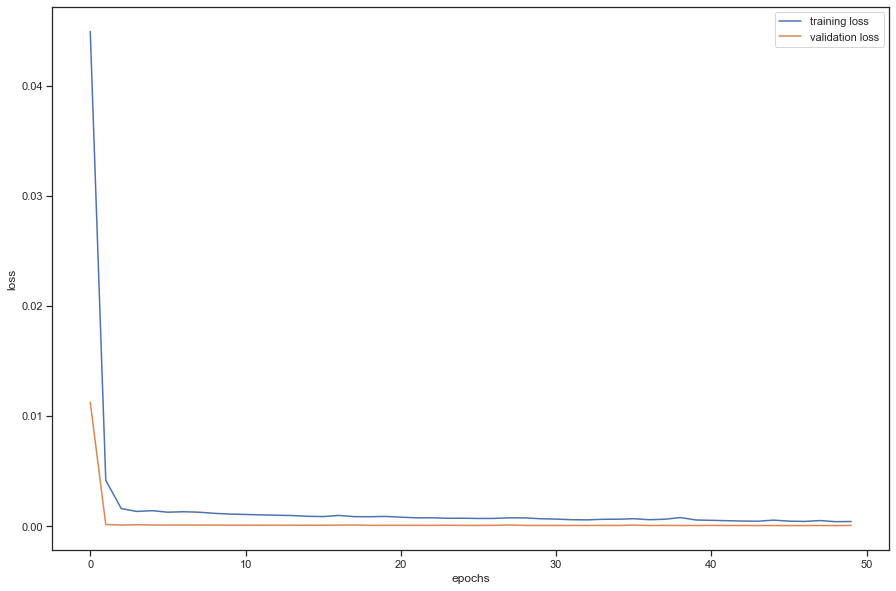

In [50]:
#Fitting.history['loss']
#Fitting.history['accuracy']
#Fitting.history['val_loss']
#Fitting.history['val_accuracy']
plt.plot(Fitting.history['loss'])
plt.plot(Fitting.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['training loss','validation loss'], loc='upper right')
plt.show()

#### Following the above graph we can deduce that the loss of our model through training and then validation is minimal, Can be improved slightly through the addition of more epochs ( around 20 to 30)

### Prediction and performance metrics check

#### Calculating RMSE ( root mean squared error / regression metrics)  performance metrics

In [51]:
#prediction
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [52]:
##transform back to original form before scaling
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#imports
import math
from sklearn.metrics import mean_squared_error #loss function

In [ ]:
#train data RMSE
math.sqrt(mean_squared_error(Y_train,train_predict))

14.299897782145564

In [55]:
#test data RMSE
math.sqrt(mean_squared_error(Y_test, test_predict))

1.6197686937881974

#### Plotting our models training results

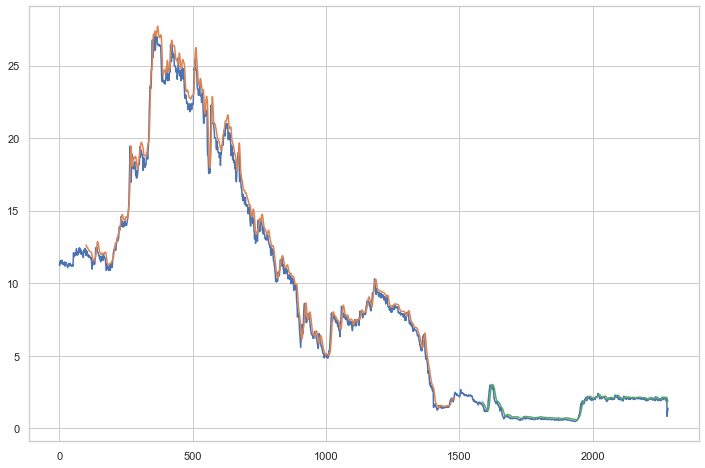

In [56]:
# shift train predictions for plotting
sns.set_style('whitegrid')
look_back=100
trainPredictPlot = np.empty_like(df_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_price)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(df_price))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)

plt.show()

# Prediction for next X days

In [57]:
#checking data length to pick data history range (100 days)
#Choose number of days for prediction
next_X_days = 20
length_test_data = len(test_data)

In [58]:
#taking 100 test data
x_input = test_data[length_test_data-100:].reshape(1,-1)
x_input.shape

(1, 100)

#### converting 100 inputs to list  to use for the next_X_days prediction

In [59]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()

#### Demonstrating prediction for the next X days

In [60]:
# demonstrate prediction for next X days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<next_X_days):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=1)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=1)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)

1/1 [==============================] - 0s 20ms/step
[0.04303724]
101
1 day input [0.05933158 0.06045813 0.06045813 0.05933158 0.05858055 0.057454
 0.05820503 0.05782952 0.05895606 0.05895606 0.05782952 0.05595193
 0.057454   0.05707848 0.0552009  0.05369884 0.05557642 0.05557642
 0.05557642 0.05557642 0.05407435 0.05407435 0.05557642 0.0552009
 0.05557642 0.057454   0.05820503 0.0597071  0.06120916 0.05895606
 0.05895606 0.05895606 0.05782952 0.05782952 0.057454   0.057454
 0.05858055 0.05670297 0.05632745 0.05595193 0.05595193 0.05595193
 0.05632745 0.05933158 0.05933158 0.05933158 0.05632745 0.05444987
 0.05444987 0.05444987 0.05444987 0.06421329 0.06383778 0.06271123
 0.05933158 0.05933158 0.05632745 0.05632745 0.05632745 0.05482538
 0.057454   0.05632745 0.05444987 0.05444987 0.05632745 0.05632745
 0.05595193 0.05595193 0.057454   0.057454   0.05858055 0.05369884
 0.05820503 0.05820503 0.05895606 0.06083365 0.06308674 0.06271123
 0.05933158 0.05670297 0.05670297 0.057454   0.057454

In [61]:
#The arange ====> ([start,] stop[, step,][, dtype]) : Returns an array with evenly spaced elements as per the interval. The interval mentioned is half-opened i.e. [Start, Stop) 
day_new = np.arange(1,101)
day_pred_range = 101 + next_X_days
day_pred=np.arange(101,day_pred_range)

In [62]:
df_price.shape

(2284, 1)

### Plotting next_X_days prediction with the last  100 days before

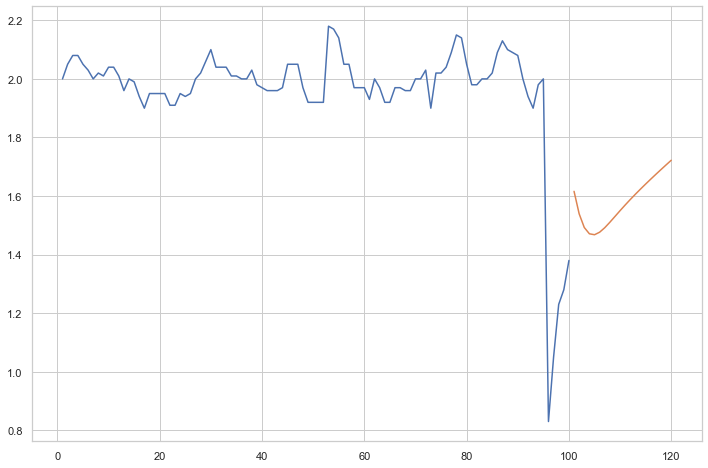

In [63]:
# import matplotlib.pyplot as plt ==> imported top
plot_size = df_price.shape[0]-100
plt.figure(figsize=(12,8))
plt.plot(day_new,scaler.inverse_transform(df_price[plot_size:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))